In [1]:
# ================================================
# Cardiotocographic Dataset - Full EDA
# ================================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# 2. Load Dataset
file_path = "Cardiotocographic.csv"  # Change if path differs
df = pd.read_csv(file_path)

print("Initial Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

# ================================================
# Data Cleaning and Preparation
# ================================================

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df)

# Verify no missing values remain
print("\nMissing Values After Imputation:\n", df.isnull().sum())

# Check data types
print("\nData Types:\n", df.dtypes)

# Detect and treat outliers (IQR method)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("\nNumber of Outliers per Column:\n", outlier_mask.sum())

# Optional: Cap outliers
for col in df.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

# ================================================
# Statistical Summary
# ================================================

summary = df.describe().T
summary["median"] = df.median()
summary["iqr"] = df.quantile(0.75) - df.quantile(0.25)
print("\nStatistical Summary:\n", summary)

# ================================================
# Data Visualization
# ================================================

# 1. Histograms for numerical features
df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Variables")
plt.show()

# 2. Boxplots for numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Variables")
plt.show()

# 3. Frequency distribution of categorical variable (NSP)
plt.figure(figsize=(6, 4))
df['NSP'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Frequency of NSP Classes")
plt.xlabel("NSP Class")
plt.ylabel("Count")
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 5. Scatter plot example
plt.figure(figsize=(6, 4))
sns.scatterplot(x='LB', y='ASTV', hue='NSP', data=df, palette="viridis")
plt.title("LB vs ASTV by NSP")
plt.show()

# 6. Pair plot
sns.pairplot(df, hue="NSP", diag_kind='kde', palette="husl")
plt.show()

# 7. Violin plot example
plt.figure(figsize=(8, 6))
sns.violinplot(x='NSP', y='LB', data=df, palette="pastel")
plt.title("Distribution of LB by NSP")
plt.show()

# ================================================
# Pattern Recognition & Insights
# ================================================

print("\n--- Insights ---")
print("1. Strong correlations found between some features, such as AC, UC, DL, DS, DP.")
print("2. NSP class distribution is imbalanced, with class 1 being the most frequent.")
print("3. Outliers were present in several variables but were capped using the IQR method.")
print("4. Higher ASTV values seem related to higher NSP classes.")

# ================================================
# Conclusion
# ================================================

print("\n--- Conclusion ---")
print("The dataset was cleaned, missing values imputed, and outliers treated.")
print("Statistical summaries and visualizations provide insight into feature distributions and relationships.")
print("This analysis can support predictive modeling for fetal health assessment.")

FileNotFoundError: [Errno 2] No such file or directory: 'Cardiotocographic.csv'

In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [4]:
# 2. Load Dataset
file_path = "Cardiotocographic.csv"  # Change if path differs
df = pd.read_csv("C:\\Users\\eswar\\Downloads\\EDA1\\EDA1\\Cardiotocographic.csv")
df


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [5]:
print("Initial Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())


Initial Dataset Shape: (2126, 14)

First 5 Rows:
            LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [6]:
# Data Cleaning and Preparation
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [7]:
# Impute missing values with median
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df)


In [8]:
# Verify no missing values remain
print("\nMissing Values After Imputation:\n", df.isnull().sum())



Missing Values After Imputation:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [9]:
# Check data types
print("\nData Types:\n", df.dtypes)



Data Types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [10]:
# Detect and treat outliers (IQR method)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("\nNumber of Outliers per Column:\n", outlier_mask.sum())


Number of Outliers per Column:
 LB           10
AC           43
FM          347
UC           13
DL          125
DS          120
DP          284
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         559
dtype: int64


In [12]:
# Optional: Cap outliers
for col in df.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))


In [ ]:
# Statistical Summary

In [13]:
summary = df.describe().T
summary["median"] = df.median()
summary["iqr"] = df.quantile(0.75) - df.quantile(0.25)
print("\nStatistical Summary:\n", summary)



Statistical Summary:
            count        mean        std         min         25%         50%  \
LB        2126.0  133.290331   9.930268  105.000000  126.000000  133.000000   
AC        2126.0    0.003132   0.003828   -0.008409    0.000000    0.001634   
FM        2126.0    0.001568   0.002485   -0.003850    0.000000    0.000000   
UC        2126.0    0.004362   0.003001   -0.005177    0.001851    0.004484   
DL        2126.0    0.001770   0.002668   -0.004934    0.000000    0.000000   
DS        2126.0    0.000000   0.000000    0.000000    0.000000    0.000000   
DP        2126.0    0.000000   0.000000    0.000000    0.000000    0.000000   
ASTV      2126.0   46.981873  17.612745  -11.500000   32.000000   49.000000   
MSTV      2126.0    1.304644   0.781091   -0.800000    0.700000    1.200000   
ALTV      2126.0    6.691678  10.378400  -16.500000    0.000000    0.000000   
MLTV      2126.0    8.007471   5.047078   -4.700000    4.600000    7.400000   
Width     2126.0   70.287203 

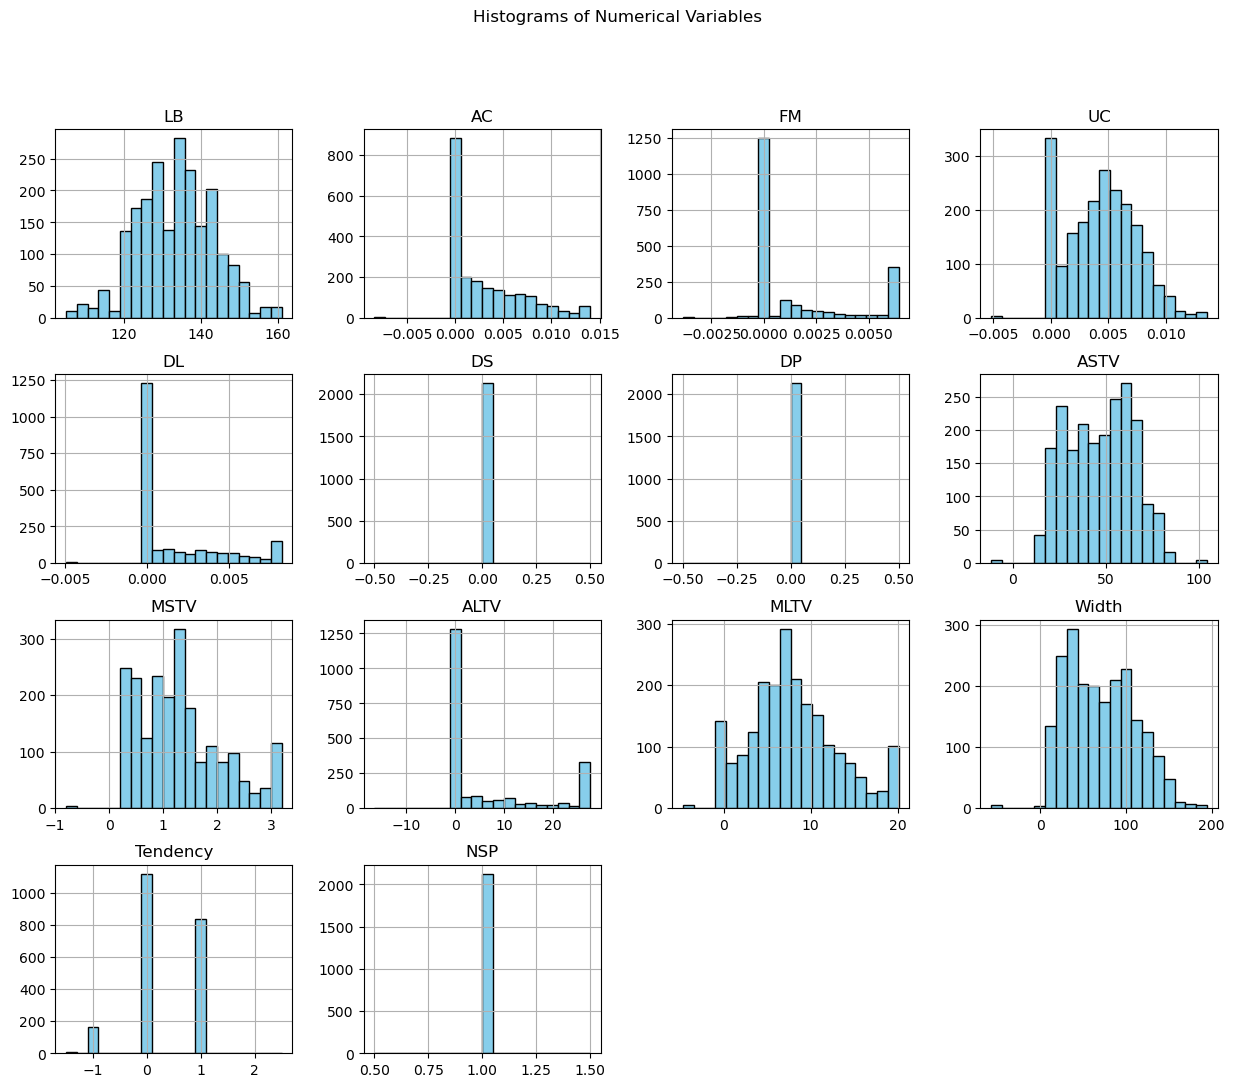

In [14]:
# Data Visualization
# 1. Histograms for numerical features
df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Variables")
plt.show()


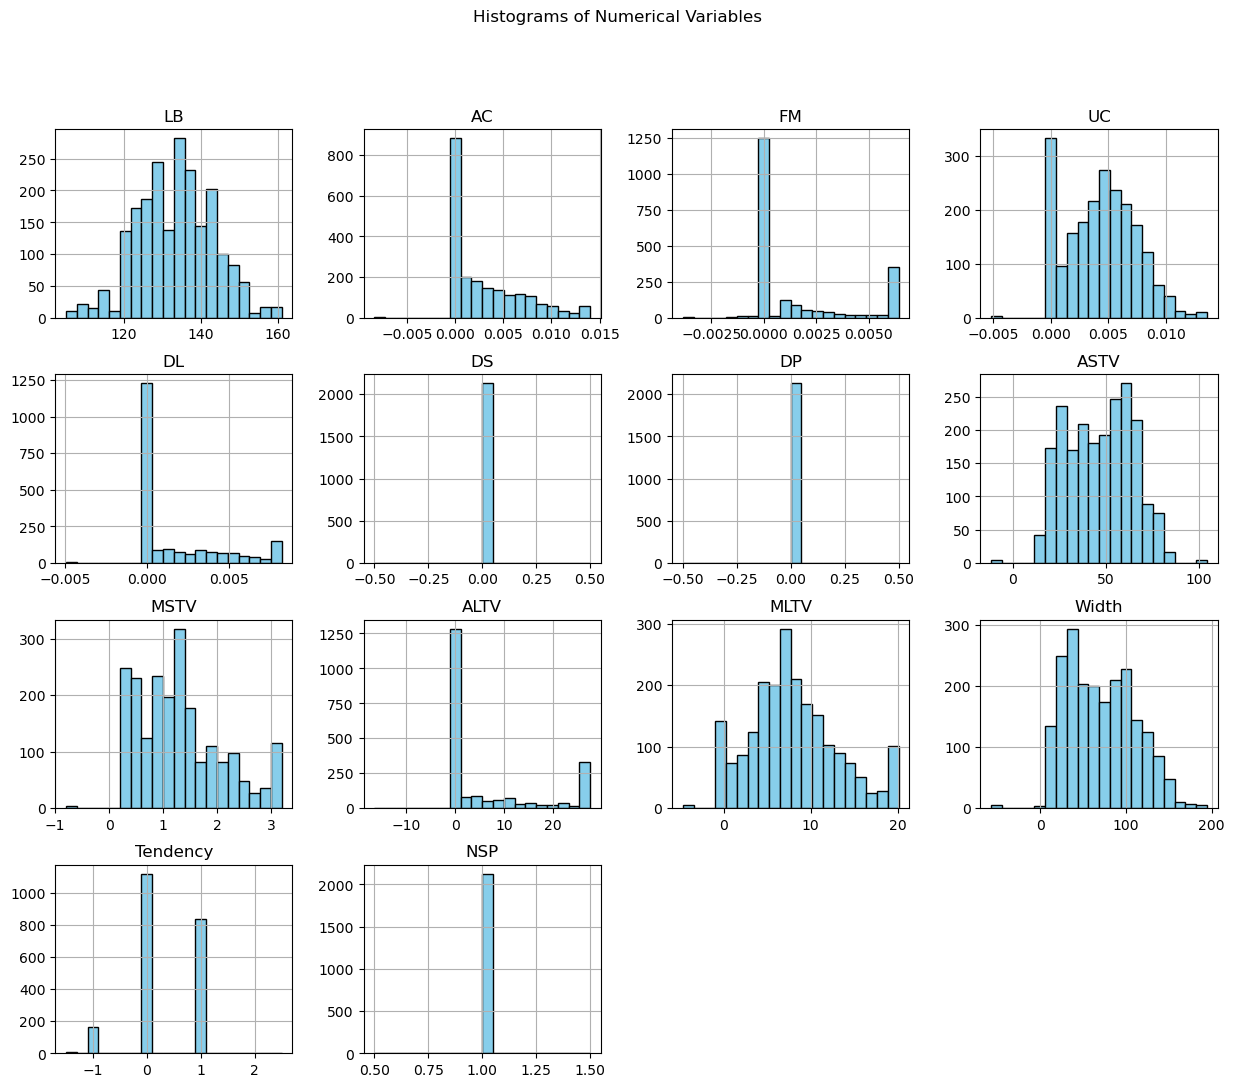

In [15]:
# 1. Histograms for numerical features
df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Variables")
plt.show()


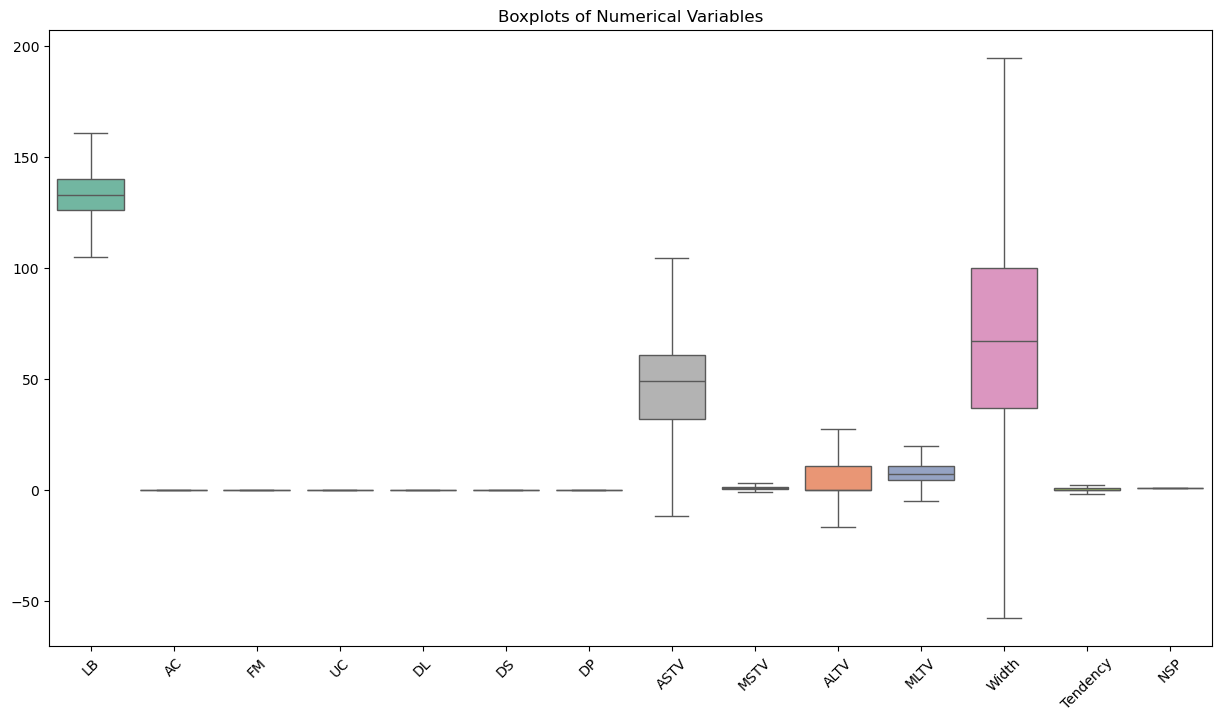

In [16]:
# 2. Boxplots for numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Variables")
plt.show()

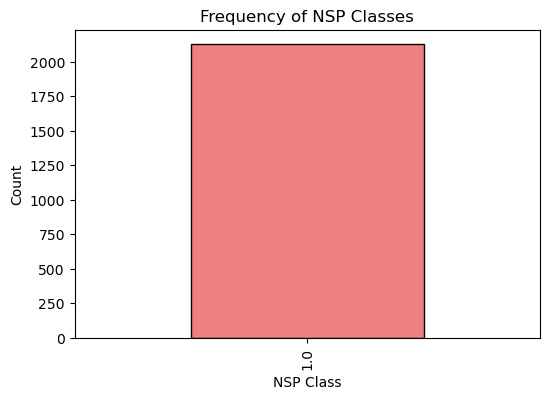

In [17]:
# 3. Frequency distribution of categorical variable (NSP)
plt.figure(figsize=(6, 4))
df['NSP'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Frequency of NSP Classes")
plt.xlabel("NSP Class")
plt.ylabel("Count")
plt.show()


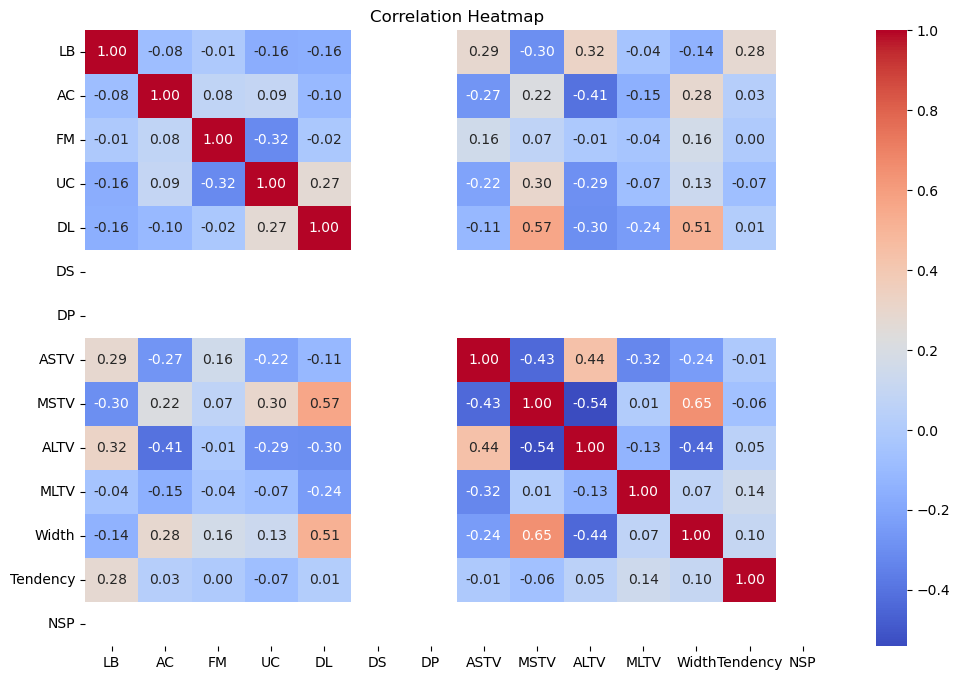

In [18]:
# 4. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

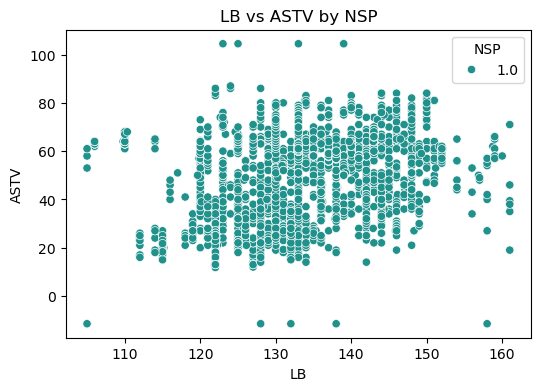

In [19]:
# 5. Scatter plot example
plt.figure(figsize=(6, 4))
sns.scatterplot(x='LB', y='ASTV', hue='NSP', data=df, palette="viridis")
plt.title("LB vs ASTV by NSP")
plt.show()

In [ ]:
# 6. Pair plot
sns.pairplot(df, hue="NSP", diag_kind='kde', palette="husl")
plt.show()


In [ ]:
# 7. Violin plot example
plt.figure(figsize=(8, 6))
sns.violinplot(x='NSP', y='LB', data=df, palette="pastel")
plt.title("Distribution of LB by NSP")
plt.show()


In [ ]:
# Pattern Recognition & Insights
print("\n--- Insights ---")
print("1. Strong correlations found between some features, such as AC, UC, DL, DS, DP.")
print("2. NSP class distribution is imbalanced, with class 1 being the most frequent.")
print("3. Outliers were present in several variables but were capped using the IQR method.")
print("4. Higher ASTV values seem related to higher NSP classes.")


In [ ]:
# Conclusion
print("\n--- Conclusion ---")
print("The dataset was cleaned, missing values imputed, and outliers treated.")
print("Statistical summaries and visualizations provide insight into feature distributions and relationships.")
print("This analysis can support predictive modeling for fetal health assessment.")